In [3]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Lab_722_hhe491').getOrCreate()

In [4]:
df = spark.read.load('./global_hunger_index.csv', format="csv", header = "true")

In [5]:
df.show()

+--------------------+---------+--------------------+-------+----+-----+--------------------+---------------------+------------------------------------+---------------------------+-----+
|      Indicator.name|indicator|        Country.name|country|time|value|                note|Livestock_Primary_egg|Beef_and_bufallo(kilograms_per_year)|Poultry(kilograms_per_year)|level|
+--------------------+---------+--------------------+-------+----+-----+--------------------+---------------------+------------------------------------+---------------------------+-----+
|Global Hunger Ind...|IFPRI-GHI|             Belarus|    BLR|2000|  2.5|In order to have ...|                  2.5|                                 4.8|                       0.63|    a|
|Global Hunger Ind...|IFPRI-GHI|               Chile|    CHL|2000|  2.5|In order to have ...|                  2.5|                                5.01|                       0.66|    a|
|Global Hunger Ind...|IFPRI-GHI|              Kuwait|    KWT|2000

In [6]:
df.columns

['Indicator.name',
 'indicator',
 'Country.name',
 'country',
 'time',
 'value',
 'note',
 'Livestock_Primary_egg',
 'Beef_and_bufallo(kilograms_per_year)',
 'Poultry(kilograms_per_year)',
 'level']

In [7]:
df.printSchema()

root
 |-- Indicator.name: string (nullable = true)
 |-- indicator: string (nullable = true)
 |-- Country.name: string (nullable = true)
 |-- country: string (nullable = true)
 |-- time: string (nullable = true)
 |-- value: string (nullable = true)
 |-- note: string (nullable = true)
 |-- Livestock_Primary_egg: string (nullable = true)
 |-- Beef_and_bufallo(kilograms_per_year): string (nullable = true)
 |-- Poultry(kilograms_per_year): string (nullable = true)
 |-- level: string (nullable = true)



In [8]:
df.count()

460

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
import numpy as np
hunger=pd.read_csv("./global_hunger_index.csv",keep_default_na=True)

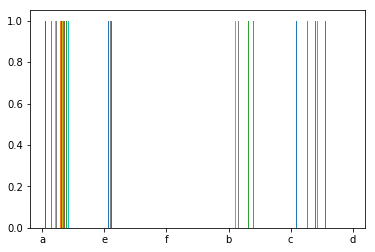

In [10]:
plt.hist(hunger["level"])
plt.show()

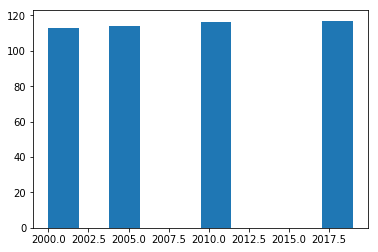

In [11]:
plt.hist(hunger["time"])
plt.show()

In [12]:
hunger.isnull().any()

Indicator.name                          False
indicator                               False
Country.name                            False
country                                 False
time                                    False
value                                   False
note                                     True
Livestock_Primary_egg                    True
Beef_and_bufallo(kilograms_per_year)     True
Poultry(kilograms_per_year)              True
level                                   False
dtype: bool

In [13]:
hunger.isnull().any().sum()

4

In [14]:
hunger.isnull().sum()

Indicator.name                            0
indicator                                 0
Country.name                              0
country                                   0
time                                      0
value                                     0
note                                    419
Livestock_Primary_egg                    21
Beef_and_bufallo(kilograms_per_year)     23
Poultry(kilograms_per_year)              23
level                                     0
dtype: int64

In [15]:
hunger.isnull().mean()

Indicator.name                          0.000000
indicator                               0.000000
Country.name                            0.000000
country                                 0.000000
time                                    0.000000
value                                   0.000000
note                                    0.910870
Livestock_Primary_egg                   0.045652
Beef_and_bufallo(kilograms_per_year)    0.050000
Poultry(kilograms_per_year)             0.050000
level                                   0.000000
dtype: float64

In [16]:
hunger1=pd.read_csv("global_hunger_index.csv",keep_default_na=False)

In [17]:
hunger1.isnull().any().sum()

0

In [18]:
hunger1.isnull().sum()

Indicator.name                          0
indicator                               0
Country.name                            0
country                                 0
time                                    0
value                                   0
note                                    0
Livestock_Primary_egg                   0
Beef_and_bufallo(kilograms_per_year)    0
Poultry(kilograms_per_year)             0
level                                   0
dtype: int64

In [19]:
hunger1.isnull().mean()

Indicator.name                          0.0
indicator                               0.0
Country.name                            0.0
country                                 0.0
time                                    0.0
value                                   0.0
note                                    0.0
Livestock_Primary_egg                   0.0
Beef_and_bufallo(kilograms_per_year)    0.0
Poultry(kilograms_per_year)             0.0
level                                   0.0
dtype: float64

In [20]:
hunger1['time']

0      2000
1      2000
2      2000
3      2000
4      2000
5      2000
6      2000
7      2000
8      2000
9      2000
10     2000
11     2000
12     2000
13     2000
14     2000
15     2000
16     2000
17     2000
18     2000
19     2000
20     2000
21     2000
22     2000
23     2000
24     2000
25     2000
26     2000
27     2000
28     2000
29     2000
       ... 
430    2019
431    2019
432    2019
433    2019
434    2019
435    2019
436    2019
437    2019
438    2019
439    2019
440    2019
441    2019
442    2019
443    2019
444    2019
445    2019
446    2019
447    2019
448    2019
449    2019
450    2019
451    2019
452    2019
453    2019
454    2019
455    2019
456    2019
457    2019
458    2019
459    2019
Name: time, Length: 460, dtype: int64

In [21]:
hunger2=pd.DataFrame(hunger1[['country','time','value','Livestock_Primary_egg','Beef_and_bufallo(kilograms_per_year)','Poultry(kilograms_per_year)','level']])
for i in range(len(hunger)):
    if hunger2.time[i] == 2000:
        hunger2.time[i] = "past"
    elif hunger2.time[i] == 2005:
        hunger2.time[i] = "past"
    elif hunger2.time[i] == 2010:
        hunger2.time[i] = "present"
    else:
        hunger2.time[i] = "present"

/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/ubuntu/.local/lib/python3.5/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ubuntu/.local/lib/python3.5/site-packages

In [22]:
hunger2["time"]

0         past
1         past
2         past
3         past
4         past
5         past
6         past
7         past
8         past
9         past
10        past
11        past
12        past
13        past
14        past
15        past
16        past
17        past
18        past
19        past
20        past
21        past
22        past
23        past
24        past
25        past
26        past
27        past
28        past
29        past
        ...   
430    present
431    present
432    present
433    present
434    present
435    present
436    present
437    present
438    present
439    present
440    present
441    present
442    present
443    present
444    present
445    present
446    present
447    present
448    present
449    present
450    present
451    present
452    present
453    present
454    present
455    present
456    present
457    present
458    present
459    present
Name: time, Length: 460, dtype: object

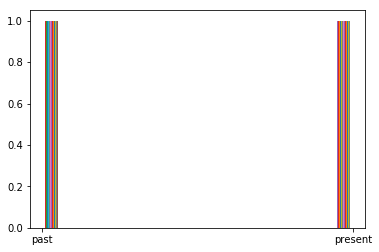

In [23]:
plt.hist(hunger2["time"])
plt.show()

In [24]:
hunger=pd.read_csv("A4.csv",keep_default_na=False)

In [25]:
hunger

,Indicator.name,indicator,Country.name,country,time,value,note,level
0,Global Hunger Index (GHI),IFPRI-GHI,Belarus,BLR,2000,2.5,In order to have numeric data for all observat...,a
1,Global Hunger Index (GHI),IFPRI-GHI,Chile,CHL,2000,2.5,In order to have numeric data for all observat...,a
2,Global Hunger Index (GHI),IFPRI-GHI,Kuwait,KWT,2000,2.5,In order to have numeric data for all observat...,a
3,Global Hunger Index (GHI),IFPRI-GHI,Lithuania,LTU,2000,2.5,In order to have numeric data for all observat...,a
4,Global Hunger Index (GHI),IFPRI-GHI,Lebanon,LBN,2000,9.1,,a
5,Global Hunger Index (GHI),IFPRI-GHI,Slovakia,SVK,2000,7.3,,a
6,Global Hunger Index (GHI),IFPRI-GHI,Afghanistan,AFG,2000,52.1,,e
7,Global Hunger Index (GHI),IFPRI-GHI,Angola,AGO,2000,65.1,,f
8,Global Hunger Index (GHI),IFPRI-GHI,Albania,ALB,2000,21.5,,b
9,Global Hunger Index (GHI),IFPRI-GHI,Argentina,ARG,2000,6.6,,a


In [26]:
len(hunger.columns.values)

8

In [27]:
len(hunger)

460

In [28]:
print(hunger1.head())
len(hunger2)

              Indicator.name  indicator Country.name country  time  value  \
0  Global Hunger Index (GHI)  IFPRI-GHI      Belarus     BLR  2000    2.5   
1  Global Hunger Index (GHI)  IFPRI-GHI        Chile     CHL  2000    2.5   
2  Global Hunger Index (GHI)  IFPRI-GHI       Kuwait     KWT  2000    2.5   
3  Global Hunger Index (GHI)  IFPRI-GHI    Lithuania     LTU  2000    2.5   
4  Global Hunger Index (GHI)  IFPRI-GHI      Lebanon     LBN  2000    9.1   

                                                note Livestock_Primary_egg  \
0  In order to have numeric data for all observat...                   2.5   
1  In order to have numeric data for all observat...                   2.5   
2  In order to have numeric data for all observat...                   2.5   
3  In order to have numeric data for all observat...                   2.5   
4                                                                   2.4615   

  Beef_and_bufallo(kilograms_per_year) Poultry(kilograms_per_year) l

460

In [29]:
len(hunger1.columns.values)

11

In [30]:
hunger2.head()

,country,time,value,Livestock_Primary_egg,Beef_and_bufallo(kilograms_per_year),Poultry(kilograms_per_year),level
0,BLR,past,2.5,2.5,4.8,0.63,a
1,CHL,past,2.5,2.5,5.01,0.66,a
2,KWT,past,2.5,2.5,5.06,0.66,a
3,LTU,past,2.5,2.5,5.03,0.67,a
4,LBN,past,9.1,2.4615,4.99,0.7,a


In [31]:
hunger2

,country,time,value,Livestock_Primary_egg,Beef_and_bufallo(kilograms_per_year),Poultry(kilograms_per_year),level
0,BLR,past,2.5,2.5,4.8,0.63,a
1,CHL,past,2.5,2.5,5.01,0.66,a
2,KWT,past,2.5,2.5,5.06,0.66,a
3,LTU,past,2.5,2.5,5.03,0.67,a
4,LBN,past,9.1,2.4615,4.99,0.7,a
5,SVK,past,7.3,2.4,6.81,0.72,a
6,AFG,past,52.1,2.3847,6.36,0.74,e
7,AGO,past,65.1,2.4964,6.78,0.76,f
8,ALB,past,21.5,2.5,6.99,0.89,b
9,ARG,past,6.6,2.4909,5.63,0.87,a


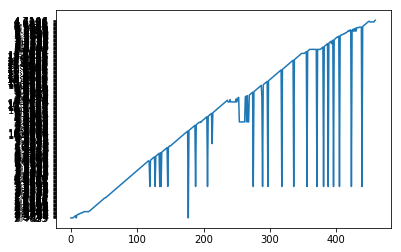

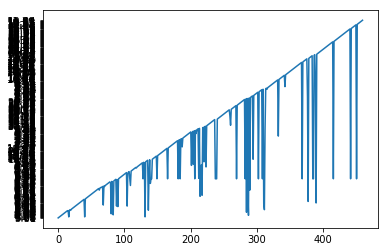

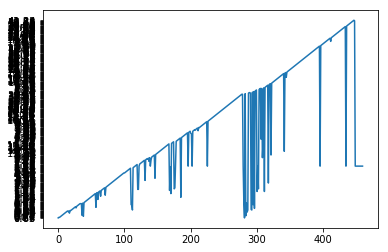

In [32]:
plt.plot(hunger2['Livestock_Primary_egg'])
plt.show()
plt.plot(hunger2['Beef_and_bufallo(kilograms_per_year)'])
plt.show()
plt.plot(hunger2['Poultry(kilograms_per_year)'])
plt.show()

In [33]:
len(hunger2)

460

In [34]:
len(hunger2.columns.values)

7

In [35]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import HiveContext
from pyspark.sql import SparkSession
from pyspark.ml.clustering import KMeans
import pyspark.ml.clustering as clus
import pandas as pd 
from pyspark.sql.types import IntegerType
from pyspark.ml.feature import StandardScaler

data=df.select('value','Livestock_Primary_egg','Beef_and_bufallo(kilograms_per_year)','Poultry(kilograms_per_year)')
hunger=data.na.drop()
hunger = hunger.withColumn("value", hunger["value"].cast(IntegerType()))
hunger = hunger.withColumn("Livestock_Primary_egg", hunger["Livestock_Primary_egg"].cast(IntegerType()))
hunger = hunger.withColumn("Beef_and_bufallo(kilograms_per_year)", hunger["Beef_and_bufallo(kilograms_per_year)"].cast(IntegerType()))
hunger = hunger.withColumn("Poultry(kilograms_per_year)", hunger["Poultry(kilograms_per_year)"].cast(IntegerType()))
assembler1=VectorAssembler(inputCols=['value','Livestock_Primary_egg','Beef_and_bufallo(kilograms_per_year)','Poultry(kilograms_per_year)'],
                        outputCol="features")

data=assembler1.transform(hunger)
train,test=data.randomSplit([0.7,0.3],seed=12)
train.printSchema()
kmeans=KMeans(k=6,seed=1)
model=kmeans.fit(train)

root
 |-- value: integer (nullable = true)
 |-- Livestock_Primary_egg: integer (nullable = true)
 |-- Beef_and_bufallo(kilograms_per_year): integer (nullable = true)
 |-- Poultry(kilograms_per_year): integer (nullable = true)
 |-- features: vector (nullable = true)



In [36]:
hunger.describe().show()

+-------+------------------+---------------------+------------------------------------+---------------------------+
|summary|             value|Livestock_Primary_egg|Beef_and_bufallo(kilograms_per_year)|Poultry(kilograms_per_year)|
+-------+------------------+---------------------+------------------------------------+---------------------------+
|  count|               395|                  395|                                 395|                        395|
|   mean| 20.66582278481013|   5.0987341772151895|                   17.10632911392405|         11.141772151898735|
| stddev|13.973133086127339|     3.31247042591476|                  20.913620642264846|          14.77754339292155|
|    min|                 2|                    1|                                   2|                          0|
|    max|                65|                   17|                                  89|                         63|
+-------+------------------+---------------------+----------------------

In [37]:
error = model.computeCost(train)
print("The Squared Errors of train set is " + str(error))

The Squared Errors of train set is 33616.02880316878


In [38]:
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[18.92857143  4.21428571 55.28571429 30.42857143]
[38.42682927  4.7804878   5.82926829  3.07317073]
[18.05555556  5.         75.38888889  8.61111111]
[16.61111111  5.80555556 29.63888889 18.91666667]
[19.875   3.1875 11.0625 52.5   ]
[11.50943396  5.5754717   6.          4.02830189]


In [39]:
error1 = model.computeCost(test)
print("The Squared Errors of test set is " + str(error1))

The Squared Errors of test set is 18571.35862228212


+-----+---------------------+------------------------------------+---------------------------+--------------------+----------+
|value|Livestock_Primary_egg|Beef_and_bufallo(kilograms_per_year)|Poultry(kilograms_per_year)|            features|prediction|
+-----+---------------------+------------------------------------+---------------------------+--------------------+----------+
|    2|                    1|                                  10|                         12| [2.0,1.0,10.0,12.0]|         5|
|    2|                    1|                                  11|                         14| [2.0,1.0,11.0,14.0]|         5|
|    2|                    1|                                  11|                         31| [2.0,1.0,11.0,31.0]|         3|
|    2|                    1|                                  14|                         39| [2.0,1.0,14.0,39.0]|         4|
|    2|                    1|                                  14|                         42| [2.0,1.0,14.0,42

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f730ab9b470>]],
      dtype=object)

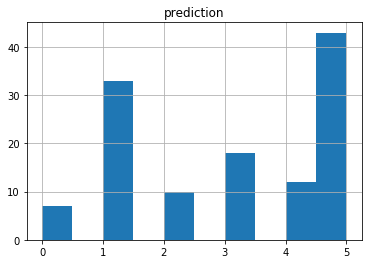

In [40]:
test_pre=model.transform(test)
test_pre.show()
test_pre.select("prediction").toPandas().hist()

In [41]:
test_pre.describe().show()

+-------+------------------+---------------------+------------------------------------+---------------------------+------------------+
|summary|             value|Livestock_Primary_egg|Beef_and_bufallo(kilograms_per_year)|Poultry(kilograms_per_year)|        prediction|
+-------+------------------+---------------------+------------------------------------+---------------------------+------------------+
|  count|               123|                  123|                                 123|                        123|               123|
|   mean|18.585365853658537|    5.056910569105691|                    18.4390243902439|         13.170731707317072| 3.008130081300813|
| stddev|13.186510015218106|   3.2322676732610947|                  21.581392387912313|         16.429535238366928|1.7856253666862123|
|    min|                 2|                    1|                                   2|                          0|                 0|
|    max|                65|                   16|     

<function matplotlib.pyplot.show(*args, **kw)>

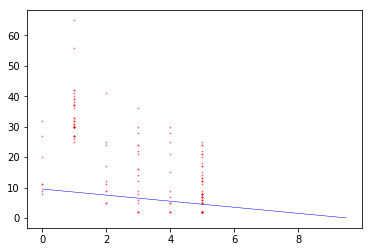

In [42]:
import matplotlib.pyplot as plt
value=test_pre.select("value").toPandas()
per=test_pre.select("prediction").toPandas()
plt.scatter(per, value, s=1, c="red", alpha=0.4)
plt.plot([0,9.5],[9.5,0],linewidth = '0.5',color='blue')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

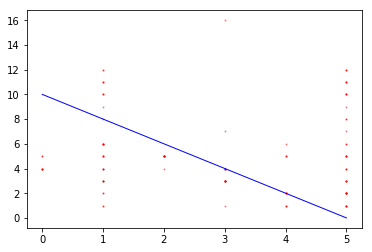

In [43]:
value=test_pre.select("Livestock_Primary_egg").toPandas()
per=test_pre.select("prediction").toPandas()
plt.scatter(per, value, s=1, c="red", alpha=0.4)
plt.plot([0,5],[10,0],linewidth = '1',color='blue')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

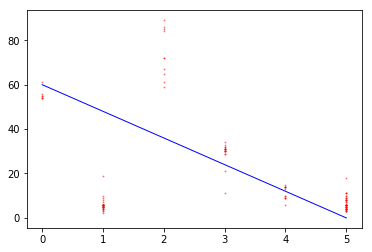

In [44]:
value=test_pre.select("Beef_and_bufallo(kilograms_per_year)").toPandas()
per=test_pre.select("prediction").toPandas()
plt.scatter(per, value, s=1, c="red", alpha=0.4)
plt.plot([0,5],[60,0],linewidth = '1',color='blue')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

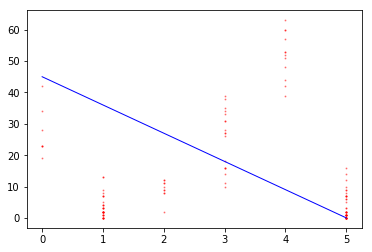

In [45]:
value=test_pre.select("Poultry(kilograms_per_year)").toPandas()
per=test_pre.select("prediction").toPandas()
plt.scatter(per, value, s=1, c="red", alpha=0.4)
plt.plot([0,5],[45,0],linewidth = '1',color='blue')
plt.show